In [1151]:
## import libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt


In [1152]:
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [1153]:
#reading the data
df = pd.read_csv('loan.csv')

In [1154]:
#Read the First five rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [1155]:
#shape of the dataframe
df.shape

(39717, 111)

In [1156]:
# Get the count of missing values
df.isnull().sum()/len(df)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [1157]:
#remove the empty columns from the data frame
df = df.drop(columns=['annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'])

In [1158]:
# remove the columns which are for post approvals
df = df.drop(columns=['tax_liens','delinq_amnt','chargeoff_within_12_mths','chargeoff_within_12_mths','collections_12_mths_ex_med','mths_since_last_major_derog','pub_rec_bankruptcies','acc_now_delinq'])

In [1159]:
# remove the columns which will not be required for analysis
df = df.drop(columns=['id', 'member_id', 'url','desc','emp_title', 'zip_code', "addr_state"])

In [1160]:
# remove the columns which are single valued.
df = df.drop(columns=['application_type','policy_code','initial_list_status','pymnt_plan'])

In [1161]:
#Read the First five rows again
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


In [1162]:
# Check columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [1163]:
# Get the count of missing values after removing columns
df.isnull().sum()/len(df)*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
title                       0.027696
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.125891
total_acc                   0.000000
o

In [1164]:
# Remove columns with high percentage missing values
df = df.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'])

In [1165]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16


In [1166]:
# Check all columns
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

In [1167]:
# remove the columns which are for current applicants
df = df.drop(columns=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'])


In [1168]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.94


In [1169]:
#shape of the dataframe after removing unnecessary columns
df.shape

(39717, 17)

##### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.


In [1170]:
# We cannot make anything up for the current loans. To exclude that data , removing the records with current loan status
df = df[df.loan_status != "Current"]
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [1171]:
# Get the count of missing values after removing current data
(df.isnull().sum()/len(df.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.028514
dti                    0.000000
dtype: float64

In [1172]:
# Check remaining columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  title                38566 non-null 

In [1173]:
# count emp_length column values
df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

##### We can assign the value of mode to the null values in the column.

## Sanity Checks

- Loan status is either charged off or fully paid loans for our analysis
- Funded amount by investor less than or equal to the loan amount
- Approved amount less than or equal to the loan amount

In [1174]:
# count loan_status column values
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [1175]:
# Check if amount funded by investor is greater than loan amount
df[df.funded_amnt_inv > df.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti


In [1176]:
# Check if amount approved by Agent is greater than loan amount
df[df.funded_amnt > df.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti


In [1177]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20


### Standardize

- "int_rate" in percentage.

In [1178]:
# removing percentage symbol from int_rate column
df.int_rate = df.int_rate.apply(lambda x : float(x.split('%')[0]))

### Derive Columns

In [1179]:
# Creating the Month Column from issue date, so as to have month
df['issue_month'] = df.issue_d.apply(lambda x : x[0:3])

In [1180]:
# Grouping Annual Income Amounts
annual_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]
annual_labels =['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000+']
df['annual_inc_grp']  = pd.cut(df.annual_inc, annual_bins,labels=annual_labels)


In [1181]:
# Grouping Loan Amounts
loan_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
loan_labels =['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000+']
df['loan_amnt_grp']  = pd.cut(df.loan_amnt, loan_bins,labels=loan_labels)


In [1182]:
# Grouping Interest Rate amounts
int_bins = [0, 5, 10, 15, 20, 25]
int_labels =['0-5','5-10','10-15','15-20','20+']
df['int_rate_grp']  = pd.cut(df.int_rate, int_bins,labels=int_labels)

In [1183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            38577 non-null  int64   
 1   funded_amnt          38577 non-null  int64   
 2   funded_amnt_inv      38577 non-null  float64 
 3   term                 38577 non-null  object  
 4   int_rate             38577 non-null  float64 
 5   installment          38577 non-null  float64 
 6   grade                38577 non-null  object  
 7   sub_grade            38577 non-null  object  
 8   emp_length           37544 non-null  object  
 9   home_ownership       38577 non-null  object  
 10  annual_inc           38577 non-null  float64 
 11  verification_status  38577 non-null  object  
 12  issue_d              38577 non-null  object  
 13  loan_status          38577 non-null  object  
 14  purpose              38577 non-null  object  
 15  title              

## Univariate

#### Loan Amount

In [1184]:
#loan_amnt spread
df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

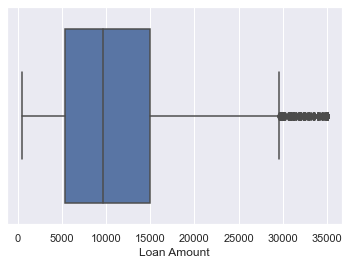

In [1185]:
# plot load_amount
sns.boxplot(df.loan_amnt)
plt.xlabel("Loan Amount")
plt.show()

#### 1.2 Funded Amount

In [1186]:
#funded_amnt_inv spread
df['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

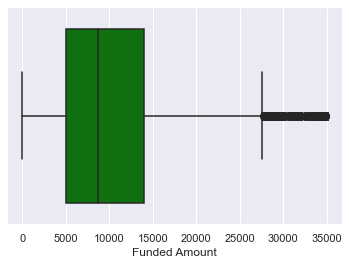

In [1187]:
# plot funded_amnt_inv
sns.boxplot(df.funded_amnt_inv, color="Green")
plt.xlabel("Funded Amount")
plt.show()

#### 1.3 DTI

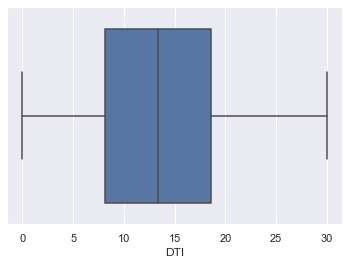

In [1188]:
# plot DTI
sns.boxplot(df.dti)
plt.xlabel("DTI")
plt.show()

###### Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

#### 1.4 Annual Income

In [1189]:
#annual_inc spread
df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

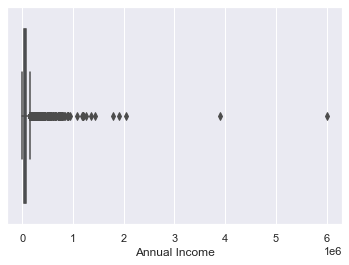

In [1190]:
# plot annual_inc
sns.boxplot(df['annual_inc'])
plt.xlabel("Annual Income")
plt.show()

In [1191]:
# check the quantile for outliers
quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

### The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation. Hence we could consider 0.95 as threshold for removing outliers.

#### Please note - We are not modifying the actual dataset but only analysing how the graph would look after removing outliers


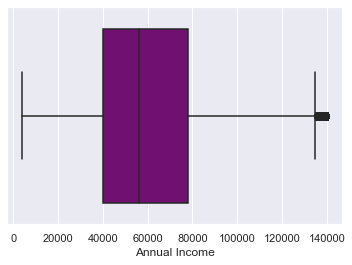

In [1192]:
# plot annual_inc after removing outliers
per_95_annual_inc = df['annual_inc'].quantile(0.95)
sns.boxplot(df[df.annual_inc <= per_95_annual_inc].annual_inc, color ='purple')
plt.xlabel("Annual Income")
plt.show()

In [1193]:
# We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

df.sub_grade = df.sub_grade.apply(lambda x : int(x[-1]))
df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

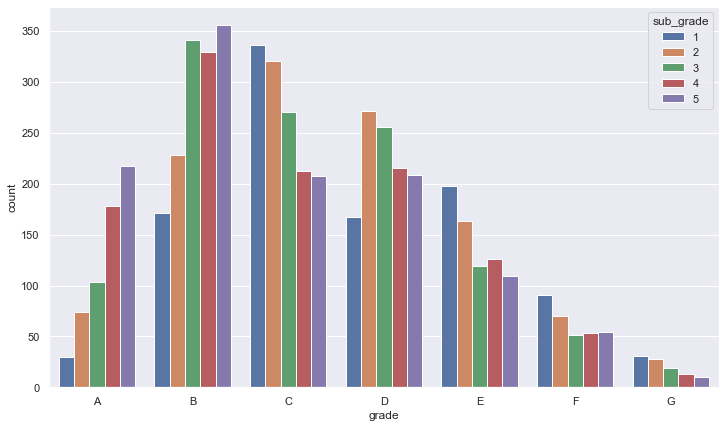

In [1194]:
# grade countplot with subgrade
fig, ax = plt.subplots(figsize=(12,7))

sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df[df.loan_status == 'Charged Off'])
plt.show()

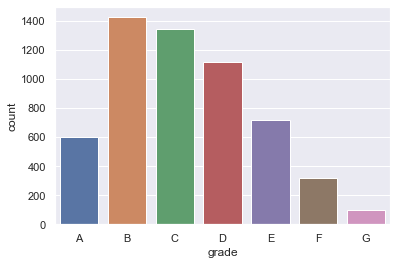

In [1195]:
# grade countplot
sns.countplot(x = 'grade', data = df[df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

###### Observation:From the above plots we can observe that there are more chances of a defaulter when Grade is 'B' and a total grade of 'B5' level.

#### Count of Full Paid Vs Charged Off Loans

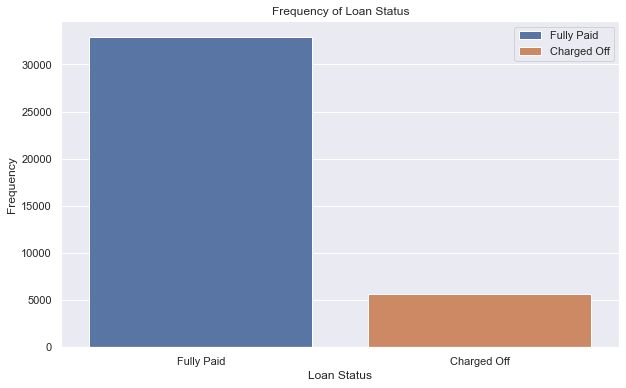

In [1196]:
#count of Fully Paid Vs Charged Off Loans
plt.figure(figsize=(10,6))
sns.countplot(df.loan_status,hue = df.loan_status,dodge=False )
plt.title("Frequency of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.legend(["Fully Paid","Charged Off"])
plt.show()

###### Observation: From the above plot we can observe that Frequency of Fully Paid Loans are more than that of Charged off Loans

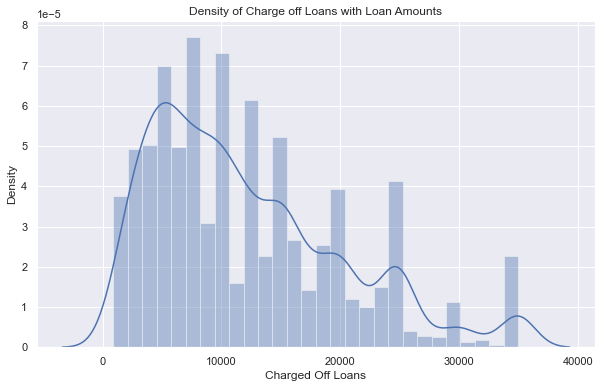

In [1197]:
# Density of Charge off Loans with Loan Amounts
plt.figure(figsize=(10,6))
sns.distplot(df[df.loan_status == 'Charged Off'].loan_amnt)
plt.title("Density of Charge off Loans with Loan Amounts")
plt.ylabel("Density")
plt.xlabel("Charged Off Loans")
plt.show()

#### Observation: From the above plot we can observe that most of the charge of loan amounts are between 5000 to 15000

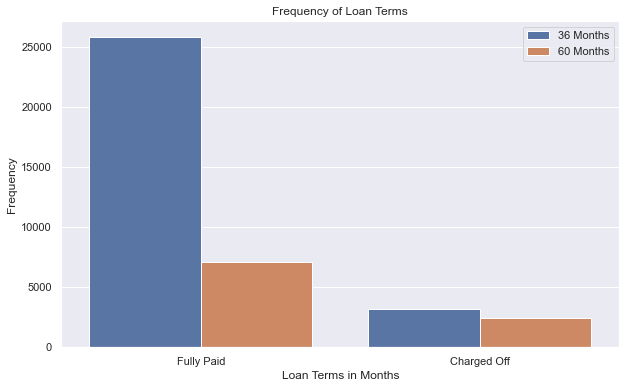

In [1198]:
#count of Term of Loans    
    
plt.figure(figsize=(10,6))
sns.countplot(df.loan_status,hue=df.term)
plt.title("Frequency of Loan Terms")
plt.xlabel("Loan Terms in Months")
plt.ylabel("Frequency")
plt.legend(['36 Months','60 Months'])
plt.show()

#### Observation: From the above we can observe thet Frequecy of 36 M Loan terms is higher that 60 M Loan Terms for both Charged off and Fully Paid Loans

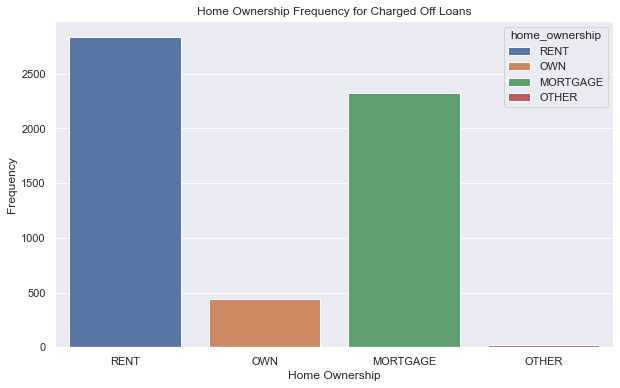

In [1199]:
# Frequency of Home Ownership for the Charged off Loan Amounts

plt.figure(figsize=(10,6))
sns.countplot(df[df.loan_status == 'Charged Off'].home_ownership,hue=df[df.loan_status == 'Charged Off'].home_ownership,dodge=False)
plt.title("Home Ownership Frequency for Charged Off Loans")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency")
plt.show()

###### Observation: From the above we can observe that Count of Charged off loans is more with Rented Homeownership whereas its less with Own Homeownership 

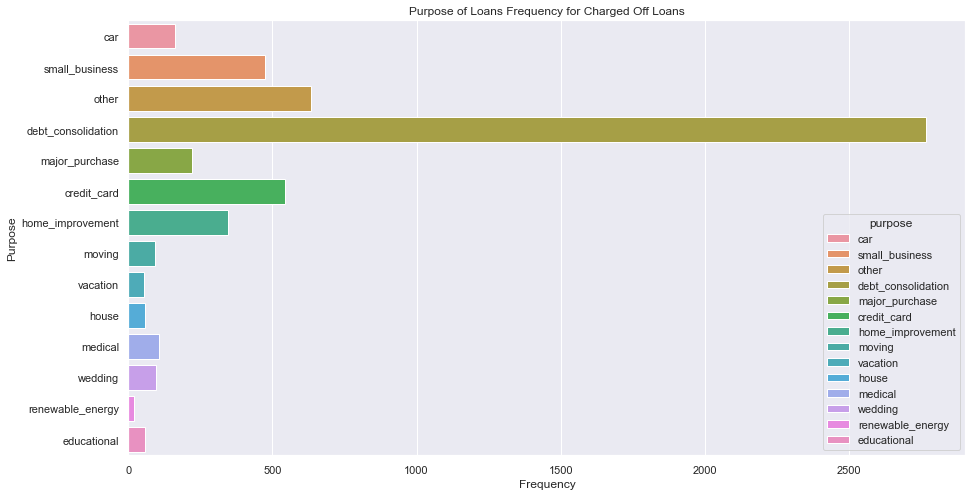

In [1200]:
#count of Purpose of Loans
    
plt.figure(figsize=(15,8))
sns.countplot(y=df[df.loan_status == 'Charged Off'].purpose,hue=df[df.loan_status == 'Charged Off'].purpose,dodge=False)
plt.title("Purpose of Loans Frequency for Charged Off Loans")
plt.xlabel("Frequency")
plt.ylabel("Purpose")
plt.show()

###### Observation: From the above we can observe that Count of debt_consolidation is more than any other purpose for Charged Off loans

### Bi Variate analysis

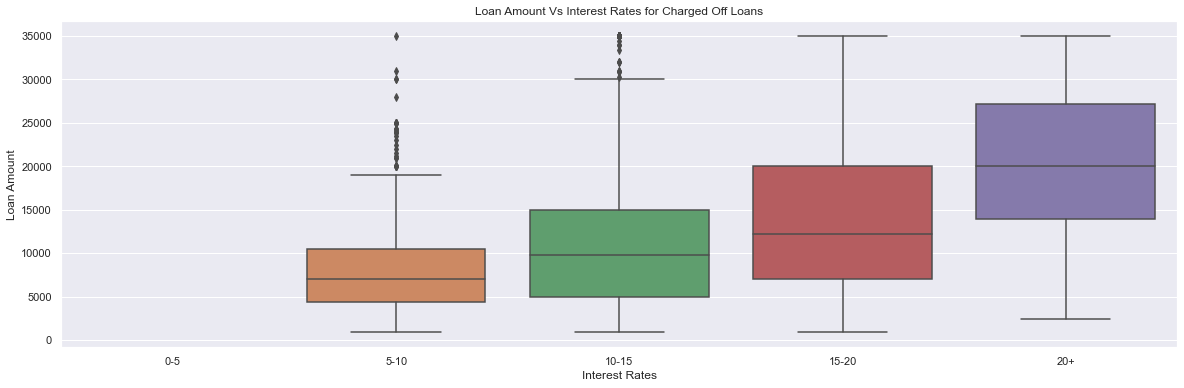

In [1201]:
# Scatter plot to check the loan amount and interest rates for Charged Off Loans

plt.figure(figsize=(20,6))
sns.boxplot(df[df.loan_status == 'Charged Off'].int_rate_grp,df[df.loan_status == 'Charged Off'].loan_amnt)
plt.title("Loan Amount Vs Interest Rates for Charged Off Loans")
plt.xlabel("Interest Rates")
plt.ylabel("Loan Amount")
plt.show()

###### Observation: For Loan with Higher Amount we have higher rate of interest

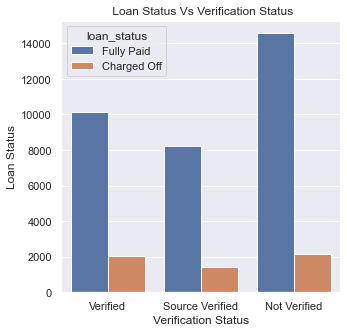

In [1202]:
# Verification status against Loan status

plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df["verification_status"],hue=df["loan_status"])
plt.title(" Loan Status Vs Verification Status")
plt.xlabel("Verification Status")
plt.ylabel("Loan Status")
plt.show()

###### Observation: From the above we can observe that verification status is not a basis to provide loans

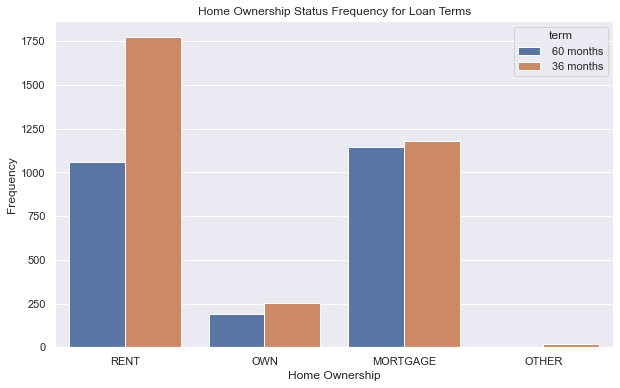

In [1203]:
# Home Ownership Frequency with respect to Loan Terms for Charged Off Loans

plt.figure(figsize=(10,6))
sns.countplot(df[df.loan_status == 'Charged Off'].home_ownership,hue=df[df.loan_status == 'Charged Off'].term)
plt.title("Home Ownership Status Frequency for Loan Terms")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency")
plt.show()

###### Observation: From the above we can observe that loans with Home Ownership as Rent and low Payment terms are more for Charged off Loans

<AxesSubplot:xlabel='term', ylabel='count'>

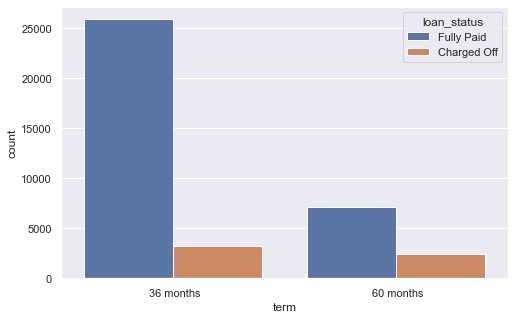

In [1204]:
# Loan Term against Loan status

plt.figure(figsize=(8,5))
sns.countplot(data=df,x=df["term"],hue=df["loan_status"])

######  Observation: From the above we can observe that long term of loan may discourage borrowers from paying rest of loan

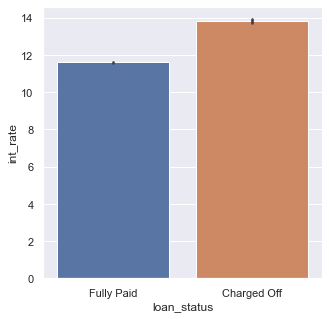

In [1205]:
# Interest against Loan status
    
plt.figure(figsize=(5,5))
sns.barplot(y=df["int_rate"],x=df["loan_status"])
plt.show()

##### Observation: From above we can observe that loans with in the interest range of 12-14 % are all charged off!!

#### Thank you!!

#### Submitted By <br> <br> Name: Ishan Singh Gill <br> Email: isgill146@gmail.com